In [26]:
from fastai.vision import *
from fastai import *
from fastai.metrics import error_rate
from sklearn.metrics import confusion_matrix
from shutil import unpack_archive
import os
import glob
import sys
from pathlib import Path

Unpack the our image datasets into current directory

In [7]:
# unpack_archive('SECOND_DATASET.zip')

Check the count of images ahead of splitting into train, validation and test

In [24]:
# top_folders = ['TRAIN', 'VALIDATION', 'TEST']
# sub_folders = ['cardboard', 'glass', 'metal', 'paper', 'plastic']

# for top_folder in top_folders:
#     for sub_folder in sub_folders:
#         folder = os.path.join('DATASET', top_folder, sub_folder)
#         if not os.path.exists(folder):
#             os.makedirs(folder)

In [58]:
# all_files = []

# for folders in sub_folders:
#     all_files.append(sorted(os.listdir('DATASET/TRAIN/{}'.format(folders))))
    
# train_pct = 0.6 
# val_pct = 0.4

# val_num = []
    
# for i in range(len(sub_folders)):
#     train = int(len(all_files[i]) * train_pct)
#     val = int(len(all_files[i]) * val_pct)
#     test = int(len(all_files[i]) * test_pct)
#     val_num.append(val)
#     print (sub_folders[i], ':',train, '/', val)

# val_num

cardboard : 241 / 161
glass : 300 / 200
metal : 246 / 164
paper : 356 / 237
plastic : 289 / 192


[161, 200, 164, 237, 192]

In [40]:
# folder_train = ['DATASET/TRAIN/{}'.format(folder_name) for folder_name in sub_folders]
# folder_val = ['DATASET/VAL/{}'.format(folder_name) for folder_name in sub_folders]
# folder_test = ['DATASET/TEST/{}'.format(folder_name) for folder_name in sub_folders]

In [59]:
# for i in range(len(sub_folders)):
#     for x in range(len(all_files[i])):
#         if len(os.listdir('DATASET/VAL/{}'.format(sub_folders[i]))) <= val_num[i]:
#             shutil.move(folder_train[i] + '/' + all_files[i][x], folder_val[i] + '/' + all_files[i][x])

In [68]:
# %rm -rf 'DATASET/VAL/cardboard/.ipynb_checkpoints'

# val_files = []

# for folders in sub_folders:
#     val_files.append(sorted(os.listdir('DATASET/VAL/{}'.format(folders))))

In [70]:
# val_pct = 0.5
# test_pct = 0.5

# test_num = []
    
# for i in range(len(sub_folders)):
#     val = int(len(val_files[i]) * val_pct)
#     test = int(len(val_files[i]) * test_pct)
#     test_num.append(test)
#     print (sub_folders[i], ':',val, '/', test)

# test_num

cardboard : 80 / 80
glass : 100 / 100
metal : 82 / 82
paper : 119 / 119
plastic : 96 / 96


[80, 100, 82, 119, 96]

In [71]:
# for i in range(len(sub_folders)):
#     for x in range(len(val_files[i])):
#         if len(os.listdir('DATASET/TEST/{}'.format(sub_folders[i]))) <= test_num[i]:
#             shutil.move(folder_val[i] + '/' + val_files[i][x], folder_test[i] + '/' + val_files[i][x])

Now we have all of our dataset correctly formatted in subdirectories, we can start exploring

In [2]:
batch_size = 50
path = Path(os.getcwd())/'DATASET'

data = ImageDataBunch.from_folder(path, train = 'TRAIN', valid = 'VAL', test = 'TEST', bs = batch_size)

In [3]:
data

ImageDataBunch;

Train: LabelList (1432 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
glass,glass,glass,glass,glass
Path: /home/jupyter/DATASET;

Valid: LabelList (477 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
glass,glass,glass,glass,glass
Path: /home/jupyter/DATASET;

Test: LabelList (481 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: /home/jupyter/DATASET

['cardboard', 'glass', 'metal', 'paper', 'plastic']


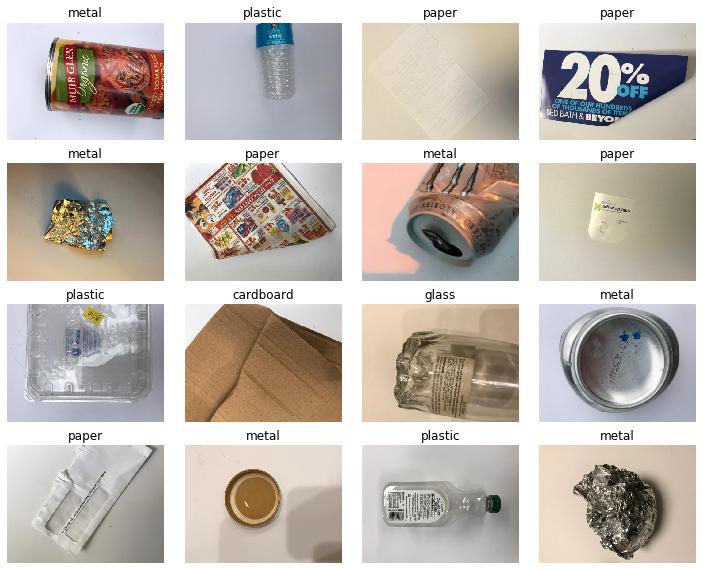

In [4]:
print (data.classes)
data.show_batch(rows = 4, figsize = (10, 8))

In [5]:
learn = create_cnn(data, models.resnet34, metrics = [accuracy, error_rate])

/opt/anaconda3/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-03
Min loss divided by 10: 7.59E-03


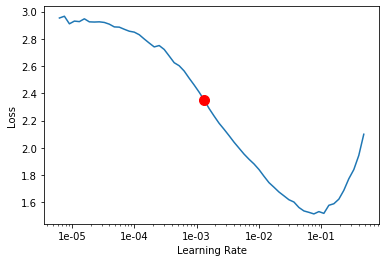

In [6]:
learn.lr_find(start_lr = 1e-6, end_lr = 1e2)
learn.recorder.plot(suggestion = True)

In [7]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

0.0013182567385564075

In [8]:
learn.fit_one_cycle(10, max_lr = min_grad_lr)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.098698,1.112856,0.568134,0.431866,00:13
1,1.223948,0.623378,0.786164,0.213836,00:12
2,0.753575,0.658052,0.800839,0.199161,00:12
3,0.487313,0.616465,0.821803,0.178197,00:12
4,0.333409,0.545563,0.840671,0.159329,00:12
5,0.231403,0.542177,0.844864,0.155136,00:12
6,0.160512,0.588265,0.823899,0.176101,00:12
7,0.112721,0.595609,0.830189,0.169811,00:12
8,0.080406,0.583177,0.840671,0.159329,00:12
9,0.066930,0.588506,0.834382,0.165618,00:12


In [9]:
interp = ClassificationInterpretation.from_learner(learn)

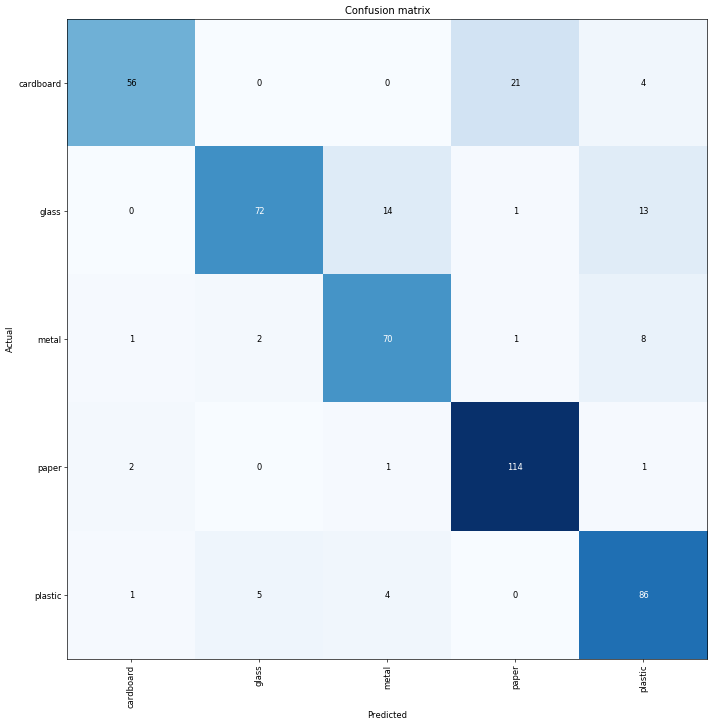

In [10]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [13]:
import cv2
import matplotlib.pyplot as plt

In [87]:
image = cv2.cvtColor(cv2.imread('DATASET/TEST/plastic/plastic100.jpg'), cv2.COLOR_BGR2RGB)
img_fastai = Image(pil2tensor(image, dtype=np.float32).div_(255))

learn.predict(img_fastai)
second_prediction = learn.predict(img)
second_outcome = str(second_prediction[0])
second_prob = np.array(second_prediction[2]).max()

(Category plastic,
 tensor(4),
 tensor([1.0597e-08, 1.7613e-07, 9.9964e-09, 3.7541e-10, 1.0000e+00]))

In [ ]:
img_fastai

In [105]:
# img_pixel = np.random.rand(3, 256,256)




img = Image(torch.from_numpy(image.reshape(3, 512, 384)).float())
second_prediction = learn.predict(img)
second_outcome = str(second_prediction[0])
second_prob = np.array(second_prediction[2]).max()

In [106]:
second_prob

1.0

In [61]:
img_pixel.shape

(3, 256, 256)

In [76]:
image.reshape(3, 512, 384).shape

(3, 512, 384)

In [65]:
image.shape

(384, 512, 3)

In [52]:
learn.export()

In [ ]:
plt.imread()